In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [4]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace =True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe = OneHotEncoder(sparse = False , drop = 'first')

In [14]:
ndf = pd.DataFrame(ohe.fit_transform(df[['Gender','Geography']]).astype(int))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
ndf

,0,1,2
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,0,0,0
9998,1,1,0


In [16]:
ndf.columns = ['Geo_France', 'Geo_Spain', 'Gender_Male']

In [17]:
ndf

,Geo_France,Geo_Spain,Gender_Male
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,0,0,0
9998,1,1,0


In [18]:
df = df.join(ndf)

In [19]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [20]:
df.drop(columns=['Gender','Geography'],inplace = True)


In [21]:

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [22]:
x= df.drop(columns='Exited')
y = df['Exited']

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [27]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Spain,Gender_Male
5038,612,63,2,126473.33,1,0,1,147545.65,0,0,0
5640,477,24,2,95675.62,2,0,0,162699.70,0,1,0
6716,515,29,4,151012.55,2,1,0,9770.97,1,0,1
4673,644,33,2,0.00,1,1,0,96420.58,1,0,0
2939,533,39,2,0.00,1,0,1,73669.94,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7718,740,60,5,108028.08,2,0,0,25980.42,0,0,0
6018,731,30,7,0.00,2,0,1,143086.09,1,0,0
3060,569,43,7,0.00,2,1,1,77703.19,0,0,0
938,577,37,4,0.00,1,1,1,79881.39,0,0,0


In [28]:
x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)

In [29]:
x_train_trf

array([[-0.39994901,  2.29964595, -1.04056249, ..., -1.09609805,
        -0.58023704, -0.57234647],
       [-1.8010984 , -1.41859071, -1.04056249, ..., -1.09609805,
         1.72343359, -0.57234647],
       [-1.40670079, -0.9418937 , -0.34769138, ...,  0.91232714,
        -0.58023704,  1.74719344],
       ...,
       [-0.84624104,  0.39285792,  0.69161528, ..., -1.09609805,
        -0.58023704, -0.57234647],
       [-0.76320996, -0.17917849, -0.34769138, ..., -1.09609805,
        -0.58023704, -0.57234647],
       [-1.26139641,  2.68100355,  1.03805083, ...,  0.91232714,
        -0.58023704, -0.57234647]])

In [40]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [46]:
model = Sequential()

In [47]:
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [50]:
history = model.fit(x_train_trf,y_train,epochs=100,validation_split=0.1)

Epoch 1/100
225/225 [==============================] - 1s 2ms/step - loss: 0.6019 - val_loss: 0.5474
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5141 - val_loss: 0.4920
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4778 - val_loss: 0.4676
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4612 - val_loss: 0.4535
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4513 - val_loss: 0.4432
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4444 - val_loss: 0.4353
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4392 - val_loss: 0.4292
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4352 - val_loss: 0.4242
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4321 - val_loss: 0.4202
Epoch 10/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4296 - val_lo

In [56]:
model.layers[0].get_weights()

[array([[ 0.00841625, -0.04588863, -0.17010462],
        [-2.8705866 ,  0.04761901,  3.528643  ],
        [ 0.5042844 , -0.0185967 ,  0.27237326],
        [ 0.25883374, -0.48242763,  0.24056344],
        [-0.15731108,  0.3707616 ,  0.03278998],
        [ 0.29002634, -0.05230621,  0.20612347],
        [-1.0794706 ,  2.106836  ,  0.9031346 ],
        [ 0.01079993, -0.30766094, -0.365416  ],
        [ 0.10248034,  0.64312106, -0.1660887 ],
        [-0.7291672 , -0.7148914 , -0.09766077],
        [ 0.24627034, -0.1770986 ,  0.02804096]], dtype=float32),
 array([ 0.33718047,  0.41464815, -0.34513676], dtype=float32)]

In [58]:
y_log = model.predict(x_test_trf)

63/63 [==============================] - 0s 1ms/step


In [59]:
y_pred = np.where(y_log>0.5,1,0)

In [60]:
y_pred


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [61]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test,y_pred)

0.851

In [65]:
history.history['loss']

[0.6019359827041626,
 0.5140785574913025,
 0.477817177772522,
 0.4611746668815613,
 0.4513499140739441,
 0.44441697001457214,
 0.43918678164482117,
 0.43518316745758057,
 0.4321448802947998,
 0.4295772314071655,
 0.42747727036476135,
 0.42560768127441406,
 0.4239383041858673,
 0.4224861264228821,
 0.4211732745170593,
 0.41994205117225647,
 0.4188815653324127,
 0.4179348945617676,
 0.41717293858528137,
 0.41641220450401306,
 0.4158242344856262,
 0.41526418924331665,
 0.4147486984729767,
 0.4142909646034241,
 0.41395118832588196,
 0.4134967029094696,
 0.41317328810691833,
 0.4128279685974121,
 0.4126390218734741,
 0.4123738706111908,
 0.4121023118495941,
 0.41186341643333435,
 0.41168615221977234,
 0.4114913046360016,
 0.4113447964191437,
 0.4111487865447998,
 0.41095587611198425,
 0.4108772575855255,
 0.4107188284397125,
 0.410565584897995,
 0.41049301624298096,
 0.41030484437942505,
 0.41021275520324707,
 0.41007986664772034,
 0.40994352102279663,
 0.409850537776947,
 0.409844458103179

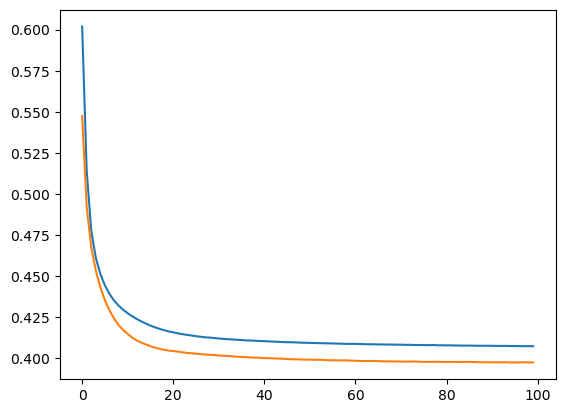

In [66]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
